<a href="https://colab.research.google.com/github/MarcusGitAccount/C-Markup-Language/blob/master/ImageResizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing different methods for resizing images that mantain the same pallet of colors in the end result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import seaborn as sns

Saving frankfurt_000000_000294_gtFine_color.png to frankfurt_000000_000294_gtFine_color (2).png


Text(0.5, 0.98, 'initial image of size (1024, 2048, 3)')

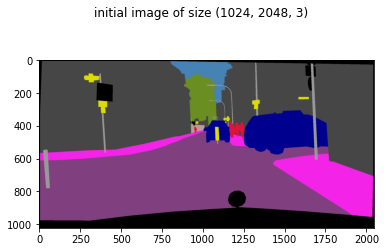

In [4]:
from google.colab import files

# Load data
uploaded = files.upload()
fname = list(uploaded.keys())[0]
initial = np.array(Image.open(fname).convert('RGB'))

fig = plt.figure()
plt.imshow(initial)
fig.suptitle(f'initial image of size {initial.shape}')

In [87]:
initial_colors, counts = np.unique(initial.reshape(-1, 3), 
                          return_counts = True, 
                          axis = 0)

In [88]:
print(f'{initial_colors.shape[0]} colors in the initial image')

11 colors in the initial image


###Binning

When scaling down an image by a vertical factor of n and an horizontal factor of m, take from the original image each pixel with a* row increment of n* and a *column increment of m*

For a Cityscape image n = 4 and m = 8

In [89]:
columns_binned = np.take(a=initial, indices=range(0, initial.shape[1], 8), axis=1)
binned_result = np.take(a=columns_binned, indices=range(0, initial.shape[0], 4), axis=0)

Text(0.5, 0.98, 'binned image of size (256, 256, 3)')

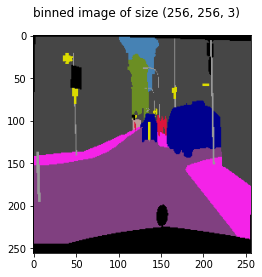

In [90]:
fig = plt.figure()
plt.imshow(binned_result)
fig.suptitle(f'binned image of size {binned_result.shape}')

In [91]:
binned_colors, binned_counts = np.unique(binned_result.reshape(-1, 3), 
                          return_counts = True, 
                          axis = 0)

In [92]:
(binned_colors == initial_colors).all()

True

###Resizing using nearest neighbor interpolation

In [93]:
nn_result = cv2.resize(initial, (256, 256), interpolation = cv2.INTER_AREA)

Text(0.5, 0.98, 'rezied image of size (256, 256, 3)')

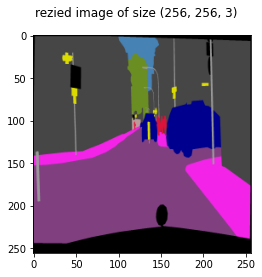

In [94]:
fig = plt.figure()
plt.imshow(nn_result)
fig.suptitle(f'rezied image of size {nn_result.shape}')

In [95]:
resized_colors, resized_counts = np.unique(nn_result.reshape(-1, 3), 
                                           return_counts = True, 
                                           axis = 0)

In [98]:
resized_colors.shape

(706, 3)

In [99]:
resized_colors == initial_colors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False